In [ ]:
import os
import re
import matplotlib.pyplot as plt


In [ ]:
def parse_abs(file_path):# file_path: ruta del archivo

    #Lee el archivo y lo guarda en content
    with open(file_path, 'r') as file:
        content = file.read()

    #Extraccion de la información
    paper_id = re.search(r'Paper:\s(.+)', content).group(1) if re.search(r'Paper:\s(.+)', content) else None
    title = re.search(r'Title:\s(.+)', content).group(1) if re.search(r'Title:\s(.+)', content) else None
    authors = re.search(r'Authors:\s(.+)', content).group(1) if re.search(r'Authors:\s(.+)', content) else None
    date = re.search(r'Date:\s(.+)', content).group(1) if re.search(r'Date:\s(.+)', content) else None
    journal_ref = re.search(r'Journal-ref:\s(.+)', content).group(1) if re.search(r'Journal-ref:\s(.+)', content) else None

    return {
        'paper_id': paper_id,
        'title': title,
        'authors': re.split(r'\s*(?:and|,)\s*', authors) if authors else [],
        'date': date,
        'journal_ref': journal_ref
    }

In [ ]:
'''
abs_folder = "/content/drive/MyDrive/datasets/cit-HepTh-abstracts/1992"
papers = []

for filename in os.listdir(abs_folder):
    if filename.endswith(".abs"):
        file_path = os.path.join(abs_folder, filename)# Para tener la ruta completa del archivo
        papers.append(parse_abs(file_path))


#for paper in papers[:5]:
 #   print(paper)
for paper in papers:
    authors = paper['authors']

    if len(authors) == 0:
      print(authors)
'''

'\nabs_folder = "/content/drive/MyDrive/datasets/cit-HepTh-abstracts/1992"\npapers = []\n\nfor filename in os.listdir(abs_folder):\n    if filename.endswith(".abs"):\n        file_path = os.path.join(abs_folder, filename)# Para tener la ruta completa del archivo\n        papers.append(parse_abs(file_path))\n\n\n#for paper in papers[:5]:\n #   print(paper)\nfor paper in papers:\n    authors = paper[\'authors\']\n\n    if len(authors) == 0:\n      print(authors)\n'

In [ ]:
#prueba
abs_folder =  "/content/drive/MyDrive/datasets/cit-HepTh-abstracts/1992"
papers = []

for filename in os.listdir(abs_folder):
    if filename.endswith(".abs"):
        file_path = os.path.join(abs_folder, filename)  # Para tener la ruta completa del archivo
        parsed_paper = parse_abs(file_path)  # Parsear el archivo
        # Solo agregar a papers si authors no está vacío
        if parsed_paper['authors']:
            papers.append(parsed_paper)

for paper in papers:
    authors = paper['authors']

    if len(authors) == 0:
      print(authors)

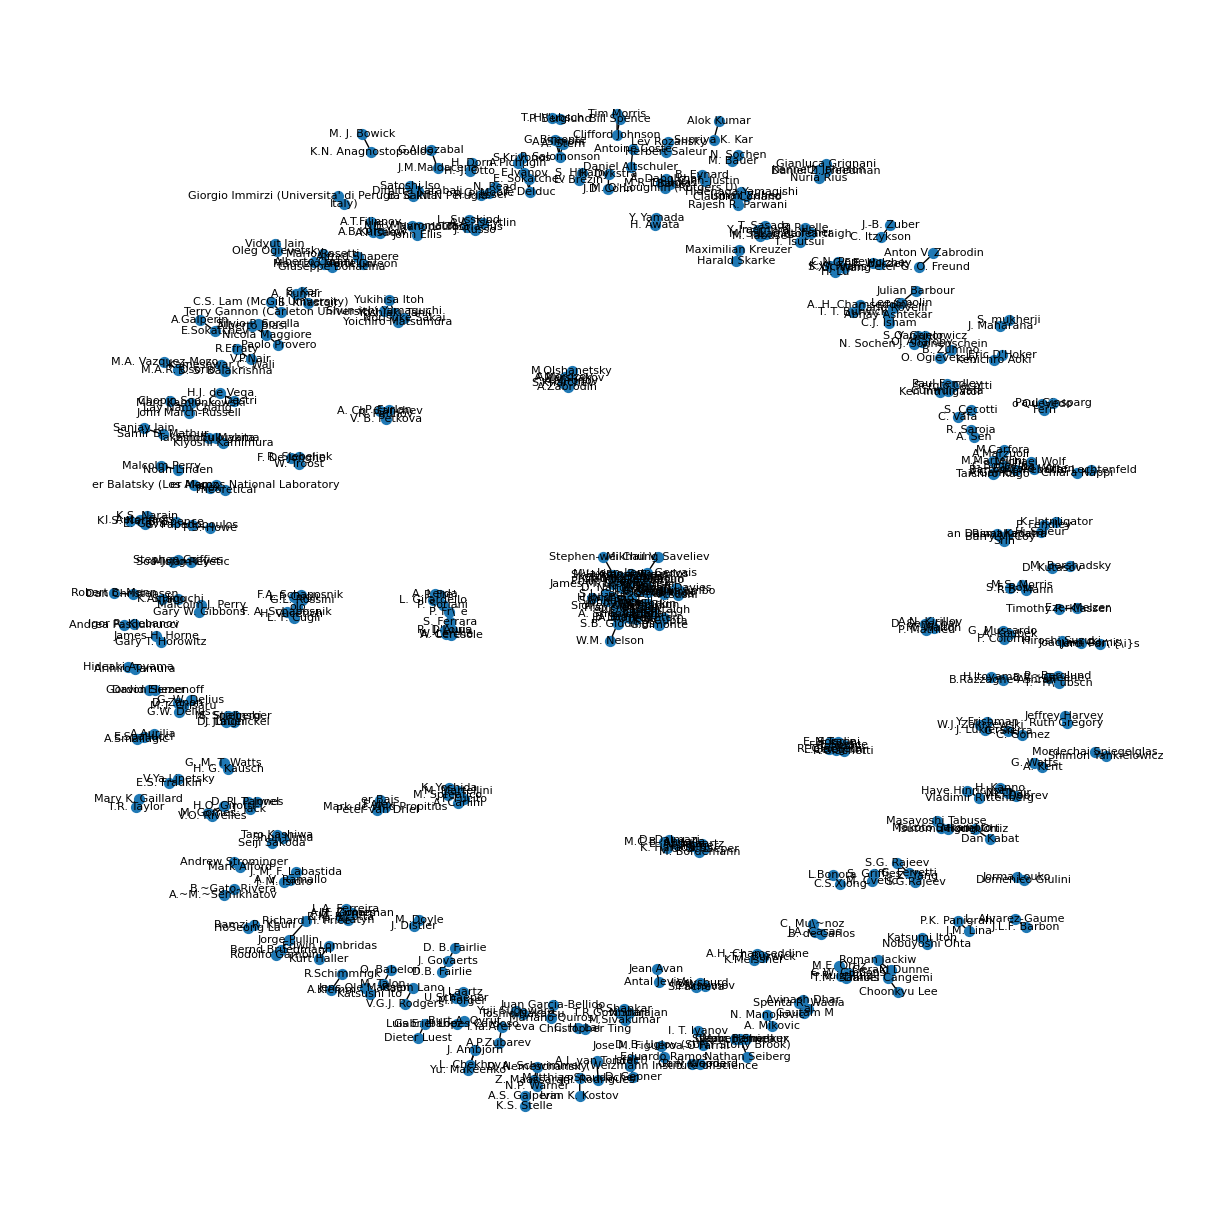

In [ ]:
import networkx as nx

coauthorship_graph = nx.Graph()


for paper in papers:
    authors = paper['authors']

    for i, author1 in enumerate(authors):
        for author2 in authors[i + 1:]:
            coauthorship_graph.add_edge(author1, author2)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(coauthorship_graph, with_labels=True, node_size=50, font_size=8)
plt.show()


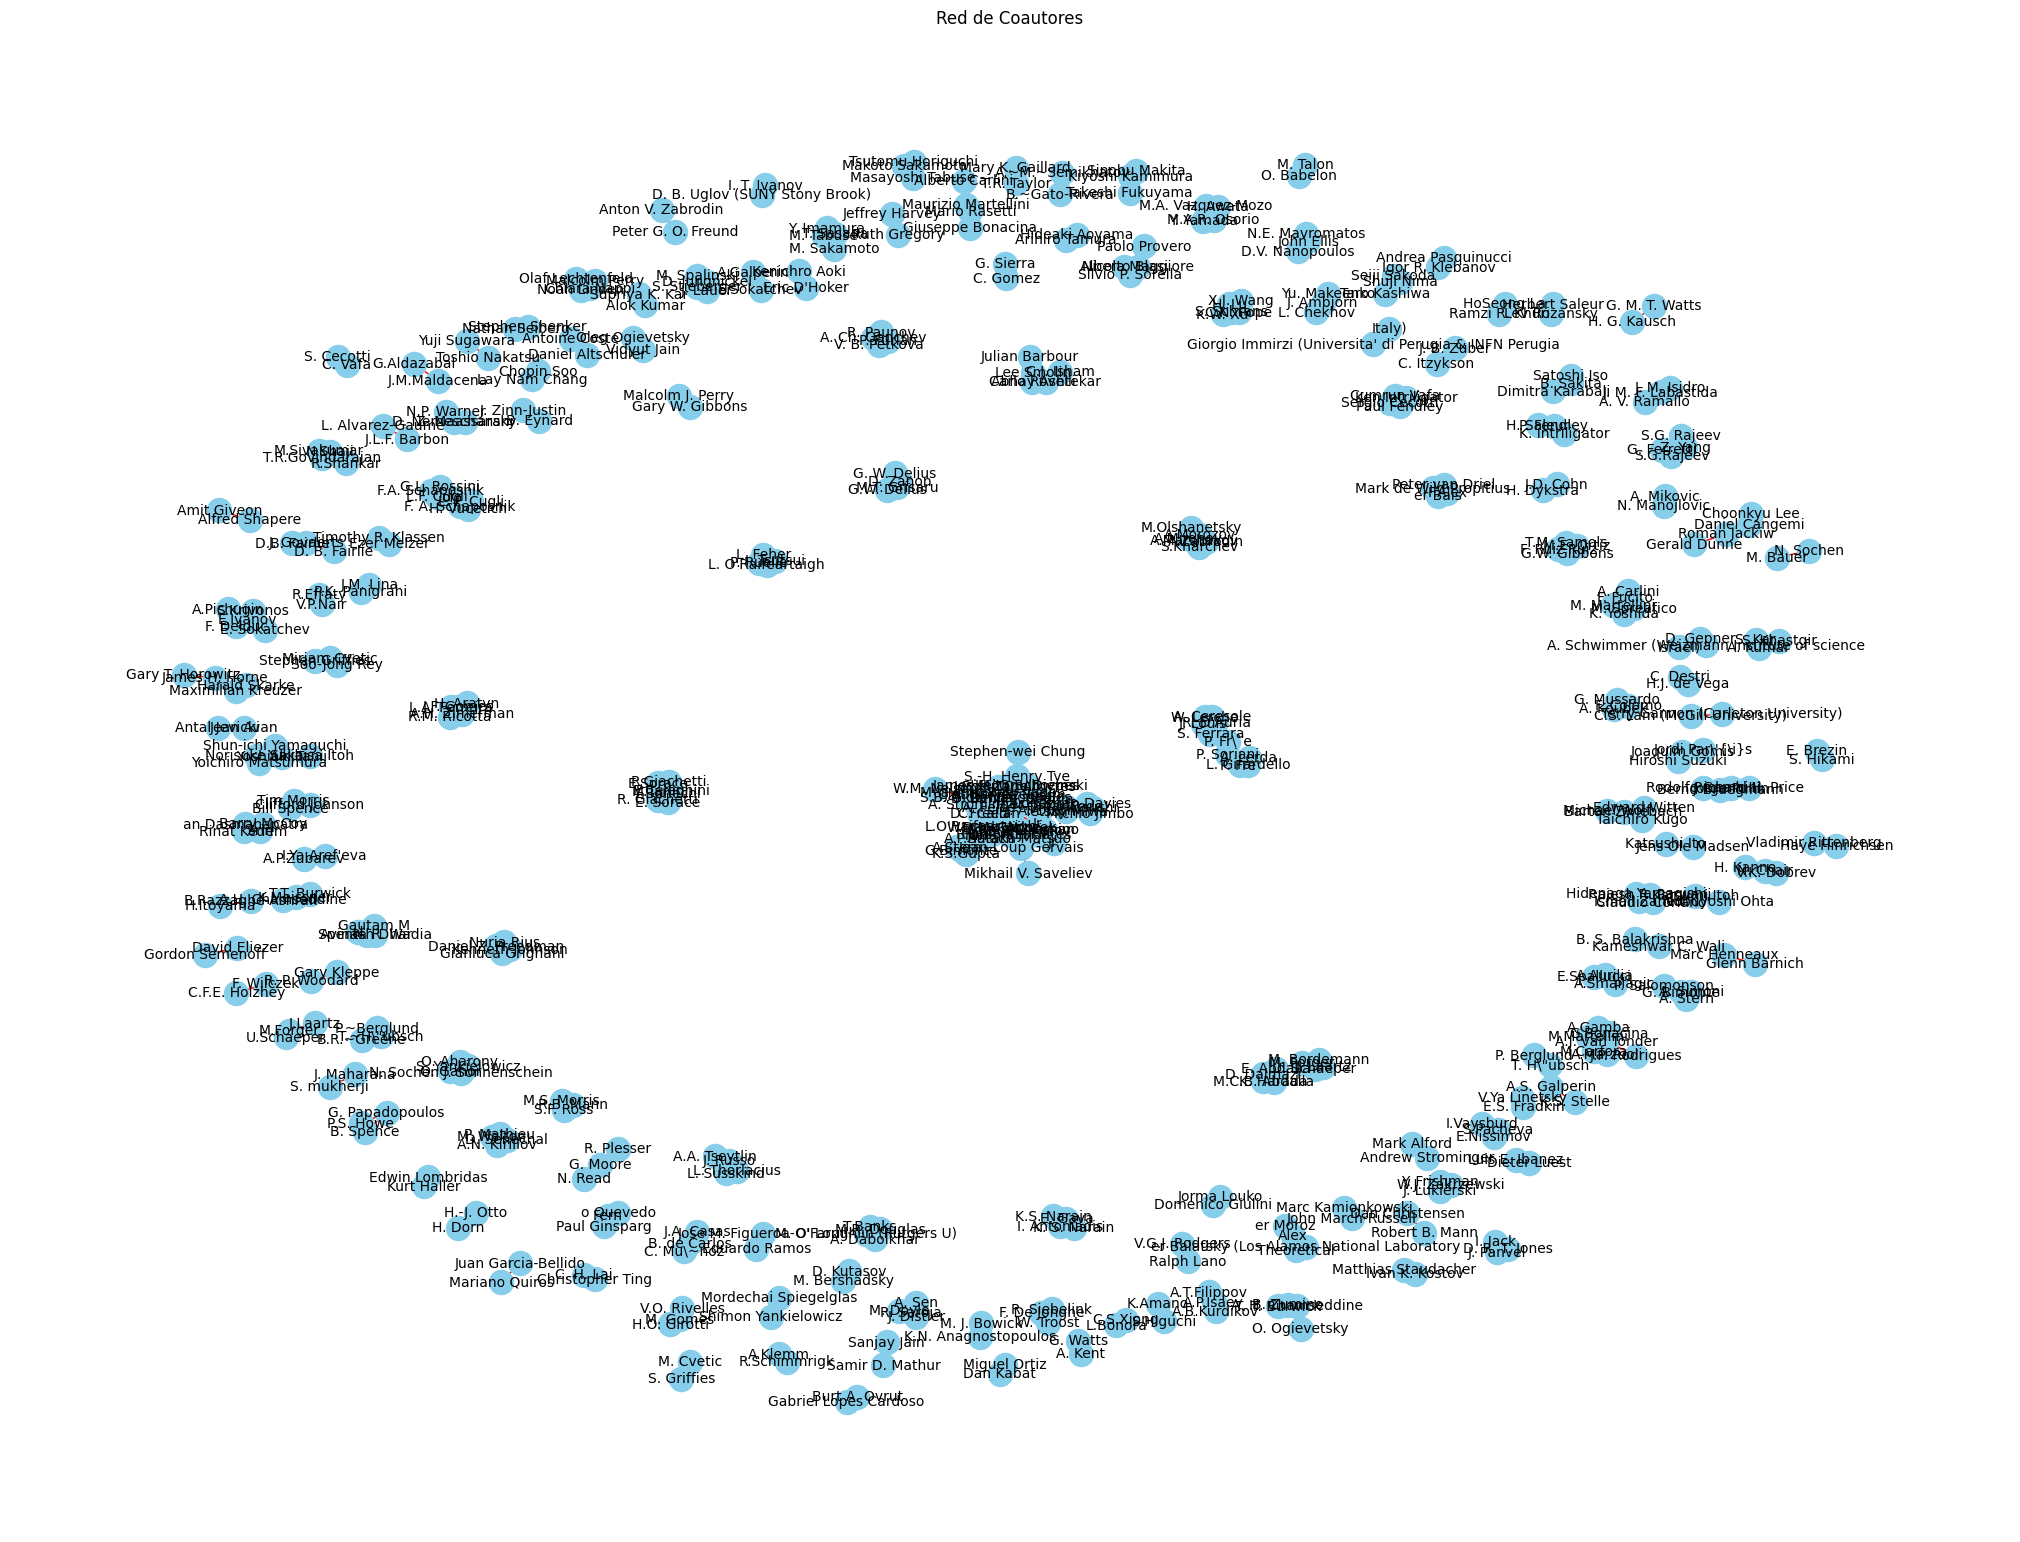

In [ ]:
plt.figure(figsize=(20, 15))
nx.draw(coauthorship_graph, with_labels=True,  node_color='skyblue', font_size=10,edge_color='red')#, font_weight='bold',
plt.title('Red de Coautores')
plt.show()

In [ ]:
degrees = dict(coauthorship_graph.degree())
top_authors = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:10]
print("Autores más conectados:", top_authors)


from networkx.algorithms.community import greedy_modularity_communities
communities = greedy_modularity_communities(coauthorship_graph)
print("Número de comunidades detectadas:", len(communities))

Autores más conectados: [('', 37), ('A.P.Balach', 9), ('ran', 9), ('olo', 6), ('W.D.McGlinn', 6), ("L.O'Raifeartaigh", 6), ('S.Sen', 6), ('R.D.Sorkin', 6), ('S. Ferrara', 6), ('F.Bonechi', 6)]
Número de comunidades detectadas: 159


# Conclusiones
Podemos notar que A.P.Balach es el autor con el nodo de alto grado, esto quiere decir que este autores muy activo en su campo ya sea con lider de proyecto o como investigador destacado que trabaja en múltiples temas y colabora en diferentes grupos.

La red de nodos podemos observar que los autores de las investigaciones trabajan en temas especializados por eso vemos varios grupos o comunidades. Es decir que posiblemente los autores trabajan en su especialidad y no en interdisciplinaria.

In [ ]:
# Número de nodos
num_nodos = coauthorship_graph.number_of_nodes()
print(f"El número de nodos es: {num_nodos}")


El número de nodos es: 493
